In [4]:
import pandas as pd
# Load dataSet_2.csv
file_path_2 = 'dataSet_2_.csv'
data = pd.read_csv(file_path_2)

data
# Display the first few rows of dataSet_2 to understand its structure


,1.8505,0.44413,-0.26072,-0.92156,-0.52009,2.7323,-1.5232,-1.2479,1.487,-0.52449,...,-0.40316,-0.55501,-0.59064,-0.63199,-0.71727,-0.64351,-0.80763,-0.27966,-0.16025,1
0,2.13930,0.67815,-0.34487,-0.93527,-0.52009,3.08680,-1.5549,-1.2048,1.4753,-0.41132,...,-1.182500,1.527000,0.267590,2.798700,0.147000,2.835500,0.153120,0.80599,0.859200,1
1,2.19670,0.63249,-0.28908,-0.89806,-0.52009,3.08970,-1.5624,-1.1764,1.5184,-0.37138,...,0.258950,-0.537660,1.899500,0.568590,-0.992550,0.192200,-0.031013,0.69062,1.500700,1
2,2.21590,0.68735,-0.31650,-0.90001,-0.52009,3.15650,-1.5627,-1.0686,1.5353,-0.34309,...,1.780200,2.820300,0.268560,-0.150870,0.241210,-0.171270,0.292480,1.05210,-0.389050,1
3,2.26450,0.69541,-0.31650,-0.93331,-0.52009,3.09840,-1.5769,-1.1232,1.4557,-0.32478,...,-0.991740,-0.520880,-0.426940,0.506380,0.355670,-0.004882,-0.669040,0.43659,0.230740,0
4,2.21590,0.67086,-0.37229,-0.97835,-0.52009,3.04900,-1.5910,-1.1791,1.4191,-0.33477,...,0.994280,-0.638780,1.958300,-1.124800,-0.969680,-1.028500,0.074121,-1.39580,-0.600540,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5916,-0.49460,0.25691,1.60670,1.64210,1.92240,0.24546,1.9545,1.6000,1.6307,2.14820,...,-0.132260,-0.004755,-0.801210,0.042059,-0.406010,0.091662,0.730800,0.45714,0.151720,1
5917,-0.48429,0.29911,1.63510,1.67340,1.92240,0.26870,1.9817,1.6059,1.6307,2.15980,...,1.373600,-0.004755,0.982660,0.094923,1.378600,1.367900,1.516800,-0.14857,0.169040,1
5918,-0.43715,0.28530,1.66250,1.68120,1.92240,0.29775,2.0059,1.6073,1.6424,2.20810,...,-0.898300,-0.004755,-0.693790,1.147100,0.633700,0.520360,-1.208600,0.54000,0.759190,1
5919,-0.47545,0.31983,1.60670,1.71850,1.92240,0.26289,2.0425,1.6059,1.6816,2.20140,...,-0.971120,-0.004755,0.982660,-0.987020,-0.979740,-0.977890,0.984770,-0.87906,-0.865510,1


In [6]:
data_2_change_rate = data.pct_change().dropna()  # This will compute the change rate and drop the first row


In [7]:
original_data = pd.read_csv('EE627A_HW3_DataSet1.csv')  # Load the original dataset
combined_data = pd.concat([original_data.iloc[:, :-1], data_2_change_rate], axis=1)  # Concatenate along columns


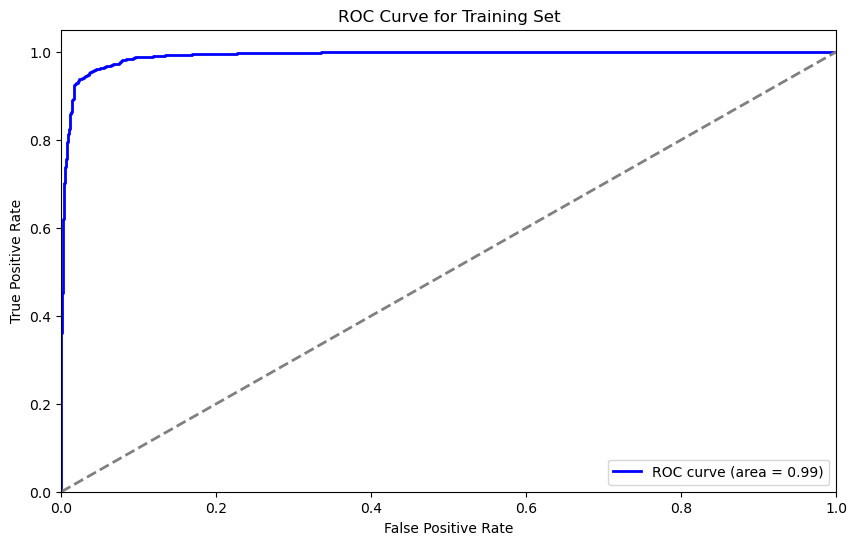

0.9910940089708967

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Splitting the dataset into predictors (X) and response (y)
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

# Splitting into training and validation sets based on row indices
X_train, X_validation = X.iloc[:3000], X.iloc[3000:]
y_train, y_validation = y.iloc[:3000], y.iloc[3000:]

# logistic regression(training set)
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_train_pred_prob = logistic_model.predict_proba(X_train)[:, 1]

# Calculating ROC curve and AUC(training set)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_prob)
auc_train = auc(fpr_train, tpr_train)

# Plotting ROC curve (training set)
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_train)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set')
plt.legend(loc="lower right")
plt.show()

auc_train


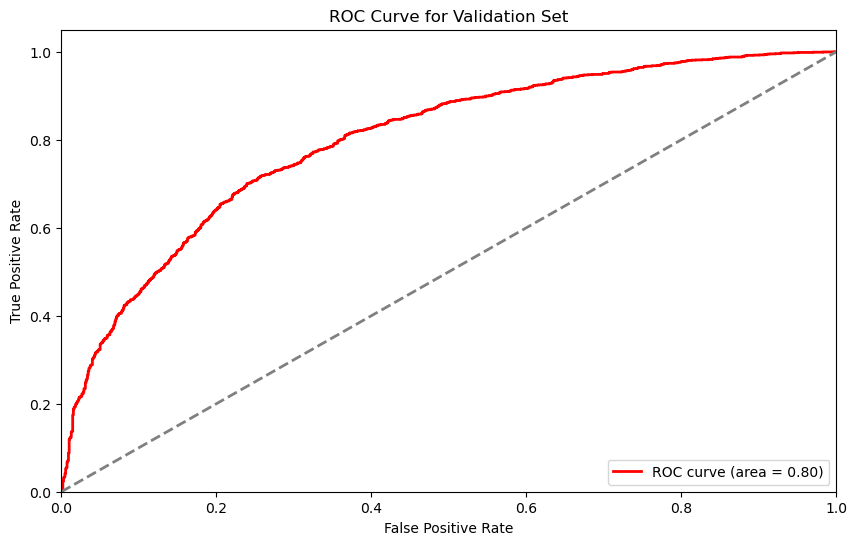

0.7976251809694972

In [6]:
# Predicting probabilities(validation set) 
y_validation_pred_prob = logistic_model.predict_proba(X_validation)[:, 1]

# Calculating ROC curve and AUC(validation set)
fpr_validation, tpr_validation, _ = roc_curve(y_validation, y_validation_pred_prob)
auc_validation = auc(fpr_validation, tpr_validation)

# Plotting ROC curve (validation set)
plt.figure(figsize=(10, 6))
plt.plot(fpr_validation, tpr_validation, color='red', lw=2, label='ROC curve (area = %0.2f)' % auc_validation)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Validation Set')
plt.legend(loc="lower right")
plt.show()

auc_validation


In [12]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score

# Initialize logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Initialize the SequentialFeatureSelector to select top 10 features
sfs = SequentialFeatureSelector(logistic_model, n_features_to_select=10, direction='forward', scoring='roc_auc', cv=5)

# Fit the model
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = sfs.get_support()

# Transform both training and validation sets
X_train_selected = sfs.transform(X_train)
X_validation_selected = sfs.transform(X_validation)

# Fit the logistic model with the selected features
logistic_model.fit(X_train_selected, y_train)

# Predict probabilities for the validation set
y_validation_pred_prob = logistic_model.predict_proba(X_validation_selected)[:, 1]

# Calculate AUC
auc_validation = roc_auc_score(y_validation, y_validation_pred_prob)

# Print the AUC
print(f'The AUC with the top 10 selected features: {auc_validation}')


The AUC with the top 10 selected features: 0.9110648494833009


In [13]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_auc_score

# Initialize logistic regression model
logistic_model = LogisticRegression(max_iter=1000)

# Initialize the SequentialFeatureSelector to select top 10 features
sfs = SequentialFeatureSelector(logistic_model, n_features_to_select=10, direction='forward', scoring='roc_auc', cv=5)

# Fit the model
sfs.fit(X_train, y_train)

# Get the selected features
selected_features = sfs.get_support()

# Print the selected features' names
selected_feature_names = X_train.columns[selected_features]
print(f'Selected features: {selected_feature_names.tolist()}')

# Transform both training and validation sets
X_train_selected = sfs.transform(X_train)
X_validation_selected = sfs.transform(X_validation)

# Fit the logistic model with the selected features
logistic_model.fit(X_train_selected, y_train)

# Predict probabilities for the validation set
y_validation_pred_prob = logistic_model.predict_proba(X_validation_selected)[:, 1]

# Calculate AUC
auc_validation = roc_auc_score(y_validation, y_validation_pred_prob)

# Print the AUC
print(f'The AUC with the top 10 selected features: {auc_validation}')


Selected features: ['0.1289', '3.8369', '2.0743', '3.5196', '3.3589', '3.0487', '-1.2281', '0.60254', '-2.178', '0.195']
The AUC with the top 10 selected features: 0.9110648494833009


In [7]:
import numpy as np

# Extracting the coefficients from the logistic regression model
coefficients = logistic_model.coef_[0]

# Getting the absolute values of the coefficients to use as a measure of feature importance
feature_importance = np.abs(coefficients)

# Ranking features by their importance (higher absolute value means higher importance)
feature_indices = np.argsort(feature_importance)[::-1]  # Sorting in descending order

# Displaying the ranked feature indices based on their importance
feature_indices


array([348,  14,   8, 824, 392, 284,   3, 457, 504,  93, 303, 538, 115,
       509,   6,  54, 333, 142, 318,  12,  11, 194, 121, 256, 251, 112,
       265, 347, 507,  31, 231, 113, 346, 489, 356, 109, 482,  67, 521,
       366,  17, 255, 200, 523,  71, 260, 110, 384, 259, 447, 410,   2,
       381, 518, 196, 257, 158, 400, 270, 390, 412, 138, 545, 546, 285,
       167, 437, 291, 337, 422, 239, 382, 339, 501, 129, 433, 232, 316,
       127, 468, 467, 354, 503, 211, 461, 404, 105, 131, 340, 369,  16,
       428, 639, 522, 321, 449,  37, 370, 530, 143,  48, 175, 192, 283,
       275, 197, 198, 281, 365, 309,  29, 505, 408, 502,  68, 250, 475,
        91, 839, 193, 426, 448,  58, 222, 497, 343, 215,  40, 472,  10,
       331, 230, 528, 566, 279, 203, 209, 869, 424, 184, 190, 202, 338,
       486, 140, 452,  60, 170, 286, 254, 533, 512, 455, 520, 872, 218,
       387, 252,  34, 272, 536, 438, 208,  19, 137, 290, 351, 122, 179,
       511, 173, 418, 213, 342, 388, 327, 495, 442, 870, 688, 39

In [8]:
importances = np.abs(logistic_model.coef_[0])
indices = np.argsort(importances)[::-1]


In [9]:
top_5_indices = indices[:5]
X_train_top_5 = X_train.iloc[:, top_5_indices]
X_validation_top_5 = X_validation.iloc[:, top_5_indices]
